In [1]:
#import libraries
import pandas as pd
import numpy as np

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

import pydotplus
import graphviz
from IPython.display import Image

In [2]:
#load the dataset
df = pd.read_csv("projekt/houbicky_public_2020.csv")
df

,Unnamed: 0,cap-surface,gill-color,gill-spacing,gill-size,mashroom-pythonity,ring-number,stalk-root,cap-color,spore-print-color,...,stalk-color-above-ring,veil-color,habitat,stalk-shape,stalk-color-below-ring,bruises,cap-shape,veil-type,gill-attachment,class
0,0,f,w,c,b,64.0,o,b,g,k,...,p,w,d,t,p,t,f,p,f,e
1,1,y,NaN,c,b,9.0,t,b,e,w,...,e,w,w,e,w,f,b,p,f,e
2,2,f,g,c,b,84.0,o,b,y,h,...,p,w,g,e,n,f,f,p,f,p
3,3,f,g,c,b,42.0,o,b,y,h,...,b,w,p,e,b,f,f,p,f,e
4,4,f,w,c,b,92.0,o,b,e,n,...,p,w,d,t,g,t,f,p,f,e
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6088,6088,f,u,c,b,26.0,o,b,g,n,...,w,w,d,t,w,t,x,p,f,e
6089,6089,f,h,c,b,13.0,o,b,g,h,...,b,w,g,e,b,f,f,p,f,p
6090,6090,y,y,w,b,83.0,n,c,n,w,...,c,w,d,e,c,NaN,k,p,f,p
6091,6091,f,w,c,b,75.0,o,b,n,n,...,w,w,d,t,w,t,f,p,f,e


In [3]:
# inspect columns
df.columns

Index(['Unnamed: 0', 'cap-surface', 'gill-color', 'gill-spacing', 'gill-size',
       'mashroom-pythonity', 'ring-number', 'stalk-root', 'cap-color',
       'spore-print-color', 'magical_property', 'odor', 'population',
       'ring-type', 'stalk-surface-above-ring', 'stalk-surface-below-ring',
       'stalk-color-above-ring', 'veil-color', 'habitat', 'stalk-shape',
       'stalk-color-below-ring', 'bruises', 'cap-shape', 'veil-type',
       'gill-attachment', 'class'],
      dtype='object')

In [4]:
# drop columns which are not useful
df.drop(columns=["Unnamed: 0", "mashroom-pythonity", "magical_property"], inplace=True)

In [5]:
# replace "?"
df.replace(to_replace="?", value=None, inplace=True)

cap-surface                 None
gill-color                  None
gill-spacing                None
gill-size                   None
ring-number                 None
stalk-root                  None
cap-color                   None
spore-print-color           None
odor                        None
population                  None
ring-type                   None
stalk-surface-above-ring    None
stalk-surface-below-ring    None
stalk-color-above-ring      None
veil-color                  None
habitat                     None
stalk-shape                 None
stalk-color-below-ring      None
bruises                     None
cap-shape                   None
veil-type                   None
gill-attachment             None
class                       None
dtype: object

In [6]:
# inspect NAs
df.isna().sum()

cap-surface                 41
gill-color                  33
gill-spacing                68
gill-size                   60
ring-number                 59
stalk-root                  55
cap-color                   27
spore-print-color           22
odor                        36
population                  46
ring-type                   38
stalk-surface-above-ring    41
stalk-surface-below-ring    39
stalk-color-above-ring      30
veil-color                  55
habitat                     38
stalk-shape                 63
stalk-color-below-ring      26
bruises                     64
cap-shape                   31
veil-type                   94
gill-attachment             68
class                       55
dtype: int64

In [7]:
# replace NAs with most frequent
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

np_imp = imp.fit_transform(df)
df_imp = pd.DataFrame(np_imp, columns=df.columns)
df_imp

,cap-surface,gill-color,gill-spacing,gill-size,ring-number,stalk-root,cap-color,spore-print-color,odor,population,...,stalk-color-above-ring,veil-color,habitat,stalk-shape,stalk-color-below-ring,bruises,cap-shape,veil-type,gill-attachment,class
0,f,w,c,b,o,b,g,k,n,v,...,p,w,d,t,p,t,f,p,f,e
1,y,b,c,b,t,b,e,w,n,c,...,e,w,w,e,w,f,b,p,f,e
2,f,g,c,b,o,b,y,h,f,y,...,p,w,g,e,n,f,f,p,f,p
3,f,g,c,b,o,b,y,h,f,y,...,b,w,p,e,b,f,f,p,f,e
4,f,w,c,b,o,b,e,n,n,y,...,p,w,d,t,g,t,f,p,f,e
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6088,f,u,c,b,o,b,g,n,n,v,...,w,w,d,t,w,t,x,p,f,e
6089,f,h,c,b,o,b,g,h,f,v,...,b,w,g,e,b,f,f,p,f,p
6090,y,y,w,b,n,c,n,w,m,c,...,c,w,d,e,c,f,k,p,f,p
6091,f,w,c,b,o,b,n,n,n,v,...,w,w,d,t,w,t,f,p,f,e


In [8]:
# expect all unique values in dataset
columns = list(df_imp)

for column in columns:
    print (df_imp[column].unique()) 

['f' 'y' 's' 'g']
['w' 'b' 'g' 'u' 'n' 'p' 'k' 'h' 'o' 'y' 'e' 'r']
['c' 'w']
['b' 'n']
['o' 't' 'n']
['b' 'c' 'r' 'e']
['g' 'e' 'y' 'c' 'w' 'n' 'p' 'b' 'r' 'u']
['k' 'w' 'h' 'n' 'r' 'u' 'o' 'y' 'b']
['n' 'f' 'y' 'a' 'l' 's' 'c' 'p' 'm']
['v' 'c' 'y' 's' 'a' 'n']
['p' 'e' 'l' 'n' 'f']
['s' 'k' 'f' 'y']
['s' 'k' 'y' 'f']
['p' 'e' 'b' 'n' 'w' 'g' 'o' 'c' 'y']
['w' 'y' 'n' 'o']
['d' 'w' 'g' 'p' 'm' 'l' 'u']
['t' 'e']
['p' 'w' 'n' 'b' 'g' 'o' 'e' 'c' 'y']
['t' 'f']
['f' 'b' 'x' 'k' 's' 'c']
['p']
['f' 'a']
['e' 'p']


In [9]:
# transform categorical column, y variable
df_edibility = df_imp["class"]
df_edibility = df_edibility.replace({"e": 1, "p": 0})

In [10]:
# transform categorical columns, X variable
df_transform = df_imp.drop("class", axis=1)
df_transform = pd.get_dummies(df_transform)
df_transform

,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,gill-color_b,gill-color_e,gill-color_g,gill-color_h,gill-color_k,gill-color_n,...,bruises_t,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,veil-type_p,gill-attachment_a,gill-attachment_f
0,1,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,1
1,0,0,0,1,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,1
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,1
4,1,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6088,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,1,0,1
6089,1,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,1
6090,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
6091,1,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,1


In [11]:
y = df_edibility
X = df_transform 

print(X.columns)
print(y.name)

Index(['cap-surface_f', 'cap-surface_g', 'cap-surface_s', 'cap-surface_y',
       'gill-color_b', 'gill-color_e', 'gill-color_g', 'gill-color_h',
       'gill-color_k', 'gill-color_n',
       ...
       'bruises_t', 'cap-shape_b', 'cap-shape_c', 'cap-shape_f', 'cap-shape_k',
       'cap-shape_s', 'cap-shape_x', 'veil-type_p', 'gill-attachment_a',
       'gill-attachment_f'],
      dtype='object', length=116)
class


In [12]:
# Split dataset to 80% train and 20% test.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)

## Experiment decision tree classifier

In [13]:
dt = tree.DecisionTreeClassifier(max_depth=6, random_state=1)

In [14]:
clf_train = dt.fit(X_train, y_train)

In [15]:
y_pred = dt.predict(X_test)

In [16]:
accuracy_score(y_test, y_pred)

0.8728465955701394

In [17]:
print(classification_report(y_test, y_pred, target_names=["edible", "poisonous"]))

              precision    recall  f1-score   support

      edible       0.86      0.88      0.87       580
   poisonous       0.89      0.87      0.88       639

    accuracy                           0.87      1219
   macro avg       0.87      0.87      0.87      1219
weighted avg       0.87      0.87      0.87      1219



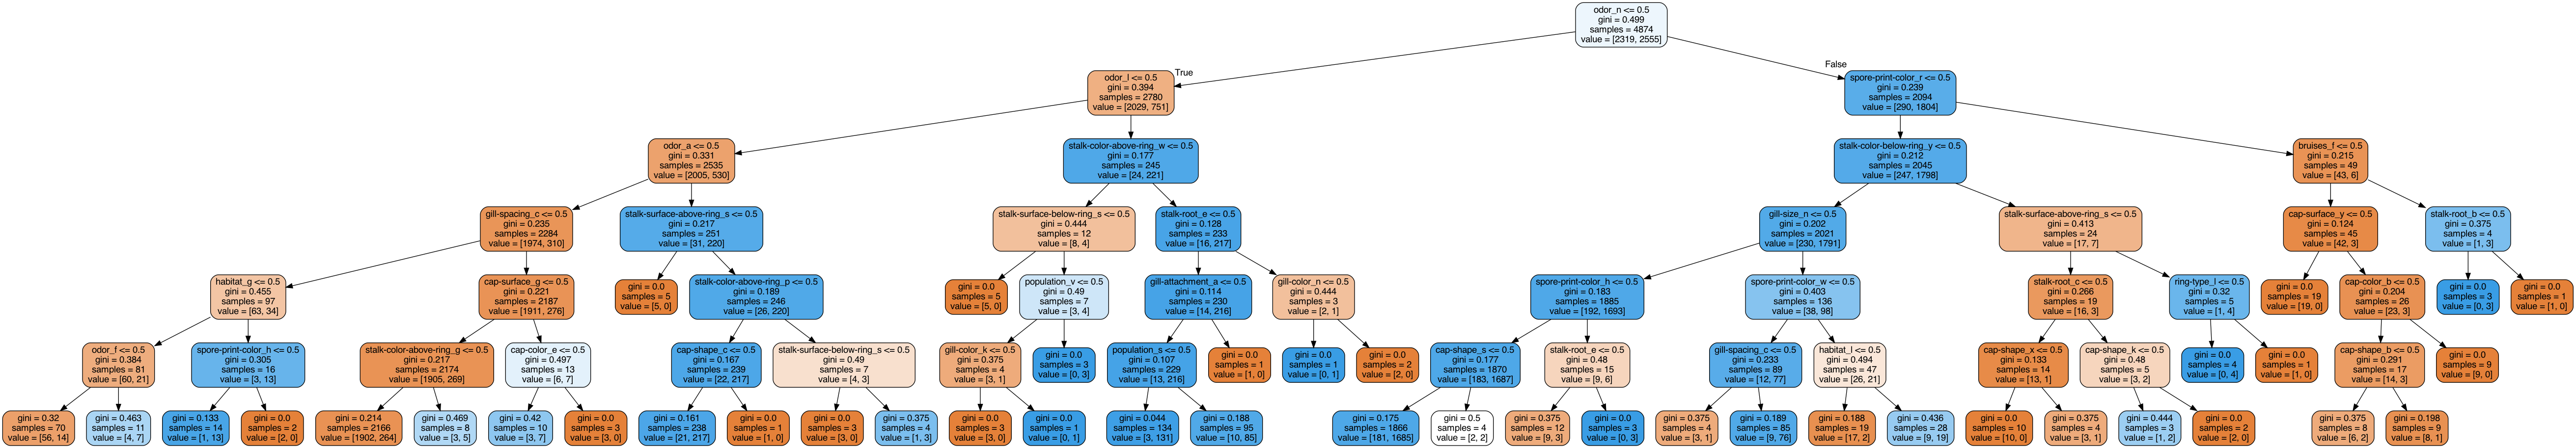

In [18]:
# Export decision tree in DOT fromat
dot_data = tree.export_graphviz(clf_train, out_file=None, feature_names=list(X.columns.values),
                               rounded=True, filled=True)
#print(dot_data)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [19]:
graph.write_png("tree.png")

True

## Compare classifiers with defaults settings

In [20]:
clf_gnb = GaussianNB()
clf_rfc = RandomForestClassifier()
clf_knc = KNeighborsClassifier()
clf_dtc = tree.DecisionTreeClassifier(max_depth=6, random_state=1)

In [21]:
clf_gnb_train = clf_gnb.fit(X_train, y_train)
clf_rfc_train = clf_rfc.fit(X_train, y_train)
clf_knc_train = clf_knc.fit(X_train, y_train)
clf_dtc_train = clf_dtc.fit(X_train, y_train)

In [22]:
gnb_y_pred = clf_gnb.predict(X_test)
rfc_y_pred = clf_rfc.predict(X_test)
knc_y_pred = clf_knc.predict(X_test)
dtc_y_pred = clf_dtc.predict(X_test)

In [23]:
print("Gaussian Naive Bayes", classification_report(y_test, gnb_y_pred, target_names=["edible", "poisonous"]))
print("Random forest classifier", classification_report(y_test, rfc_y_pred, target_names=["edible", "poisonous"]))
print("Nearest neighbours classifier", classification_report(y_test, knc_y_pred, target_names=["edible", "poisonous"]))
print("Decision tree classifier", classification_report(y_test, dtc_y_pred, target_names=["edible", "poisonous"]))

Gaussian Naive Bayes               precision    recall  f1-score   support

      edible       0.85      0.87      0.86       580
   poisonous       0.88      0.86      0.87       639

    accuracy                           0.86      1219
   macro avg       0.86      0.86      0.86      1219
weighted avg       0.86      0.86      0.86      1219

Random forest classifier               precision    recall  f1-score   support

      edible       0.87      0.87      0.87       580
   poisonous       0.89      0.88      0.88       639

    accuracy                           0.88      1219
   macro avg       0.88      0.88      0.88      1219
weighted avg       0.88      0.88      0.88      1219

Nearest neighbours classifier               precision    recall  f1-score   support

      edible       0.87      0.88      0.88       580
   poisonous       0.89      0.89      0.89       639

    accuracy                           0.88      1219
   macro avg       0.88      0.88      0.88      121

## Hyperparameter tuning

In [24]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 400, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2,3,4,5,6,7,8,9]
# Minimum number of samples required to split a node
min_samples_split = [2,3,4,5,6,7,8,9]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1,2,3,4,5,6,7,8,9]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Random state
random_state = [1,2,3,4,5,6,7,8,9]
# The strategy used to choose the split at each node
splitter = ['best', 'random']
# Number of neighbors to use
n_neighbors = [2,3,4,5,6,7,8,9,10,20,40]
# Weight function used in prediction
weights = ['uniform', 'distance']
# Algorithm used to compute the nearest neighbors
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
# 

In [25]:
# Create the param grid
param_grid_rfc = {'n_estimators': n_estimators,
                  'max_features': max_features,
                  'max_depth': max_depth,
                  'min_samples_split': min_samples_split,
                  'min_samples_leaf': min_samples_leaf,
                  'bootstrap': bootstrap,
                  'random_state': random_state}

param_grid_knc = {'n_neighbors': n_neighbors,
                  'weights': weights,
                  'algorithm': algorithm}

param_grid_dtc = {'splitter': splitter,
                  'max_features': max_features,
                  'max_depth': max_depth,
                  'min_samples_split': min_samples_split,
                  'min_samples_leaf': min_samples_leaf,
                  'random_state': random_state}


In [26]:
clf_rfc_RandomGrid = RandomizedSearchCV(estimator = clf_rfc, param_distributions = param_grid_rfc, cv = 10, verbose=2, n_jobs = 4)
clf_knc_RandomGrid = RandomizedSearchCV(estimator = clf_knc, param_distributions = param_grid_knc, cv = 10, verbose=2, n_jobs = 4)
clf_dtc_RandomGrid = RandomizedSearchCV(estimator = clf_dtc, param_distributions = param_grid_dtc, cv = 10, verbose=2, n_jobs = 4)

In [27]:
clf_rfc_RandomGrid.fit(X_train, y_train)
clf_knc_RandomGrid.fit(X_train, y_train)
clf_dtc_RandomGrid.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    7.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   16.9s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    4.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   12.5s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=4)]: Done  93 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.5s finished


RandomizedSearchCV(cv=10,
                   estimator=DecisionTreeClassifier(max_depth=6,
                                                    random_state=1),
                   n_jobs=4,
                   param_distributions={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9],
                                        'random_state': [1, 2, 3, 4, 5, 6, 7, 8,
                                                         9],
                                        'splitter': ['best', 'random']},
                   verbose=2)

In [28]:
print("RFC best params \n", clf_rfc_RandomGrid.best_params_)
print("KNC best params \n", clf_knc_RandomGrid.best_params_)
print("DTC best params \n", clf_dtc_RandomGrid.best_params_)

RFC best params 
 {'random_state': 8, 'n_estimators': 356, 'min_samples_split': 2, 'min_samples_leaf': 9, 'max_features': 'sqrt', 'max_depth': 7, 'bootstrap': True}
KNC best params 
 {'weights': 'uniform', 'n_neighbors': 10, 'algorithm': 'ball_tree'}
DTC best params 
 {'splitter': 'best', 'random_state': 9, 'min_samples_split': 3, 'min_samples_leaf': 7, 'max_features': 'auto', 'max_depth': 7}


In [29]:
print (f'Train Accuracy RFC tunned- : {clf_rfc_RandomGrid.score(X_train,y_train):.3f}', f'Test Accuracy - : {clf_rfc_RandomGrid.score(X_test,y_test):.3f}')
print (f'Train Accuracy KNC tunned- : {clf_knc_RandomGrid.score(X_train,y_train):.3f}', f'Test Accuracy - : {clf_knc_RandomGrid.score(X_test,y_test):.3f}')
print (f'Train Accuracy DTC tunned- : {clf_dtc_RandomGrid.score(X_train,y_train):.3f}', f'Test Accuracy - : {clf_dtc_RandomGrid.score(X_test,y_test):.3f}')

Train Accuracy RFC tunned- : 0.886 Test Accuracy - : 0.884
Train Accuracy KNC tunned- : 0.888 Test Accuracy - : 0.885
Train Accuracy DTC tunned- : 0.880 Test Accuracy - : 0.881


In [30]:
# Random forest classifier with tunned hyperparameters
clf_rfc_tuned = RandomForestClassifier(
    n_estimators=10,
    min_samples_split=8,
    min_samples_leaf=7,
    max_features='auto',
    max_depth=9,
    bootstrap=False,
    random_state=5)
clf_rfc_tuned_train = clf_rfc_tuned.fit(X_train, y_train)
rfc_tuned_y_pred = clf_rfc_tuned.predict(X_test)

In [31]:
# Nearest neighbours classifier with tunned hyperparameters
clf_knc_tuned = KNeighborsClassifier(
    weights='uniform',
    n_neighbors=10,
    algorithm='auto')
clf_knc_tuned_train = clf_knc_tuned.fit(X_train, y_train)
knc_tuned_y_pred = clf_knc_tuned.predict(X_test)

In [32]:
# Decision tree classifier with tunned hyperparameters
clf_dtc_tuned = tree.DecisionTreeClassifier(
    splitter='random',
    random_state=1,
    min_samples_split=2,
    min_samples_leaf=6,
    max_features='auto',
    max_depth=7)
clf_dtc_tuned_train = clf_dtc_tuned.fit(X_train, y_train)
dtc_tuned_y_pred = clf_dtc_tuned.predict(X_test)

In [33]:
print("Gaussian Naive Bayes", classification_report(y_test, gnb_y_pred, target_names=["edible", "poisonous"]))
print("Random forest classifier", classification_report(y_test, rfc_tuned_y_pred, target_names=["edible", "poisonous"]))
print("Nearest neighbours classifier", classification_report(y_test, knc_tuned_y_pred, target_names=["edible", "poisonous"]))
print("Decision tree classifier", classification_report(y_test, dtc_tuned_y_pred, target_names=["edible", "poisonous"]))

Gaussian Naive Bayes               precision    recall  f1-score   support

      edible       0.85      0.87      0.86       580
   poisonous       0.88      0.86      0.87       639

    accuracy                           0.86      1219
   macro avg       0.86      0.86      0.86      1219
weighted avg       0.86      0.86      0.86      1219

Random forest classifier               precision    recall  f1-score   support

      edible       0.87      0.88      0.88       580
   poisonous       0.89      0.88      0.89       639

    accuracy                           0.88      1219
   macro avg       0.88      0.88      0.88      1219
weighted avg       0.88      0.88      0.88      1219

Nearest neighbours classifier               precision    recall  f1-score   support

      edible       0.87      0.89      0.88       580
   poisonous       0.90      0.88      0.89       639

    accuracy                           0.88      1219
   macro avg       0.88      0.88      0.88      121

## Validate

In [34]:
df_validate = pd.read_csv('projekt/houbicky_k_ohodnoceni.csv')
df_validate

,Unnamed: 0,cap-surface,gill-color,gill-spacing,gill-size,mashroom-pythonity,ring-number,stalk-root,cap-color,spore-print-color,...,stalk-surface-below-ring,stalk-color-above-ring,veil-color,habitat,stalk-shape,stalk-color-below-ring,bruises,cap-shape,veil-type,gill-attachment
0,2761,f,u,c,b,30,o,b,g,k,...,s,p,w,d,t,w,t,x,p,f
1,3942,y,p,c,b,66,o,b,g,k,...,s,w,w,d,t,p,t,x,p,f
2,289,f,p,c,n,34,o,e,g,n,...,s,w,w,u,e,w,f,f,p,f
3,2107,y,u,c,b,47,o,b,e,k,...,s,p,w,d,t,p,t,x,p,f
4,1665,y,k,c,n,41,o,e,n,k,...,s,w,w,g,e,w,t,x,p,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2026,5242,y,g,c,b,8,o,b,y,h,...,k,p,w,d,e,p,f,f,p,f
2027,149,y,g,c,b,59,o,c,w,k,...,s,w,w,m,e,w,t,b,p,f
2028,4861,y,g,c,b,95,o,b,y,h,...,k,b,w,d,e,b,f,x,p,f
2029,5308,y,w,c,b,52,t,?,n,w,...,s,w,w,w,e,e,t,k,p,f


In [35]:
# drop columns which are not useful
df_validate.drop(columns=["Unnamed: 0", "mashroom-pythonity", "magical_property"], inplace=True)

In [36]:
# replace "?"
df_validate.replace(to_replace="?", value=None, inplace=True)

cap-surface                 None
gill-color                  None
gill-spacing                None
gill-size                   None
ring-number                 None
stalk-root                  None
cap-color                   None
spore-print-color           None
odor                        None
population                  None
ring-type                   None
stalk-surface-above-ring    None
stalk-surface-below-ring    None
stalk-color-above-ring      None
veil-color                  None
habitat                     None
stalk-shape                 None
stalk-color-below-ring      None
bruises                     None
cap-shape                   None
veil-type                   None
gill-attachment             None
dtype: object

In [37]:
# replace NAs with most frequent
np_validate_imp = imp.fit_transform(df_validate)
df_validate_imp = pd.DataFrame(np_validate_imp, columns=df_validate.columns)
df_validate_imp

,cap-surface,gill-color,gill-spacing,gill-size,ring-number,stalk-root,cap-color,spore-print-color,odor,population,...,stalk-surface-below-ring,stalk-color-above-ring,veil-color,habitat,stalk-shape,stalk-color-below-ring,bruises,cap-shape,veil-type,gill-attachment
0,f,u,c,b,o,b,g,k,n,y,...,s,p,w,d,t,w,t,x,p,f
1,y,p,c,b,o,b,g,k,n,y,...,s,w,w,d,t,p,t,x,p,f
2,f,p,c,n,o,e,g,n,n,y,...,s,w,w,u,e,w,f,f,p,f
3,y,u,c,b,o,b,e,k,n,y,...,s,p,w,d,t,p,t,x,p,f
4,y,k,c,n,o,e,n,k,p,s,...,s,w,w,g,e,w,t,x,p,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2026,y,g,c,b,o,b,y,h,f,v,...,k,p,w,d,e,p,f,f,p,f
2027,y,g,c,b,o,c,w,k,a,n,...,s,w,w,m,e,w,t,b,p,f
2028,y,g,c,b,o,b,y,h,f,v,...,k,b,w,d,e,b,f,x,p,f
2029,y,w,c,b,t,b,n,w,n,c,...,s,w,w,w,e,e,t,k,p,f


In [38]:
# transform categorical columns, X variable
df_validate_transform = pd.get_dummies(df_validate_imp)
X_validate = df_validate_transform
X_validate

,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,gill-color_b,gill-color_e,gill-color_g,gill-color_h,gill-color_k,gill-color_n,...,bruises_t,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,veil-type_p,gill-attachment_a,gill-attachment_f
0,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,1,0,1
1,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,1,1,0,1
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
3,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,1,1,0,1
4,0,0,0,1,0,0,0,0,1,0,...,1,0,0,0,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2026,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,1
2027,0,0,0,1,0,0,1,0,0,0,...,1,1,0,0,0,0,0,1,0,1
2028,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,1,0,1
2029,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,1,0,0,1,0,1


In [39]:
knc_tuned_y_pred_validate = clf_knc_tuned.predict(X_validate)
knc_tuned_y_pred_validate

array([1, 1, 1, ..., 0, 1, 1])

In [40]:
results = pd.DataFrame(knc_tuned_y_pred_validate)
results = results.replace({1: "e", 0: "p"})
results.rename(columns={0: "class"}, inplace=True)
results

,class
0,e
1,e
2,e
3,e
4,p
...,...
2026,p
2027,e
2028,p
2029,e


In [41]:
results.to_csv('results.csv', index=False)